In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys
import os

In [2]:
sys.path.append(os.path.relpath('/Users/edoardo/AstroCosmoComputational/Students'))          
from pyACC.cosmology import distances
from pyACC.calculus import interpolate

In [3]:
def H(z, Om_m, H0):
    return H0*np.sqrt(Om_m*(1+z)**3+(1-Om_m))

In [4]:
args={"Om_m":0.319, "H0":67, "Om_r":0.0,"w": -1.1}

In [5]:
## construct a CosmologicalDistances class instance
cosmo_dist=distances.CosmologicalDistances(H, H0=args['H0'], Om_m=args['Om_m'])

In [6]:
z=np.arange(0,1,0.1)

In [7]:
d_comoving = cosmo_dist.comoving_distance(z)

In [8]:
d_interpolator=interpolate.interp(z,d_comoving, extrapolate='False')

In [9]:
d_interpolated = d_interpolator(z)

Text(0, 0.5, '$d_c-d_c^{interp}$')

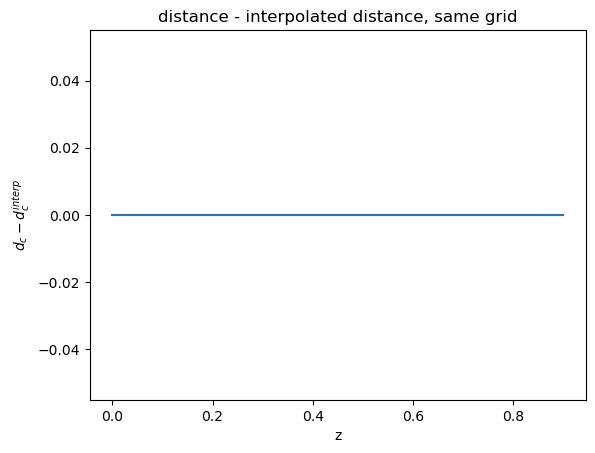

In [10]:
plt.plot(z, d_comoving-d_interpolated)
plt.title('distance - interpolated distance, same grid')
plt.xlabel('z')
plt.ylabel('$d_c-d_c^{interp}$')

In [11]:
z_2 = np.arange(0,0.9,0.01)
d_interpolated_2 = d_interpolator(z_2)

In [12]:
d_comoving_2 = cosmo_dist.comoving_distance(z_2)

Text(0, 0.5, '$d_c-d_c^{interp}$')

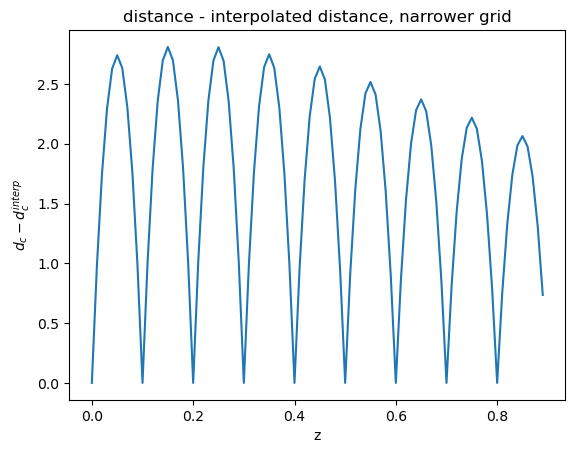

In [13]:
plt.plot(z_2, (d_comoving_2-d_interpolated_2))
plt.title('distance - interpolated distance, narrower grid')
plt.xlabel('z')
plt.ylabel('$d_c-d_c^{interp}$')

### symbolic calculation

In [14]:
import sympy as sym

# Define symbolic variable
z_s = sym.Symbol('z')

# Define symbolic expression
expr = 300000 / args['H0'] * 1 / sym.sqrt(args['Om_m'] * (1 + z_s)**3 + (1 - args['Om_m']))

# Integrate the expression with respect to z_s over the specified range
lower_limit = 0
upper_limit = 1
d_com_sym = sym.integrate(expr, (z_s, lower_limit))


In [16]:
# Differentiate d_com_sym twice
d_com_sym_second_derivative = d_com_sym.diff(z_s,2)

In [17]:
second_der = [d_com_sym_second_derivative.subs(z_s, val)for val in z_2]

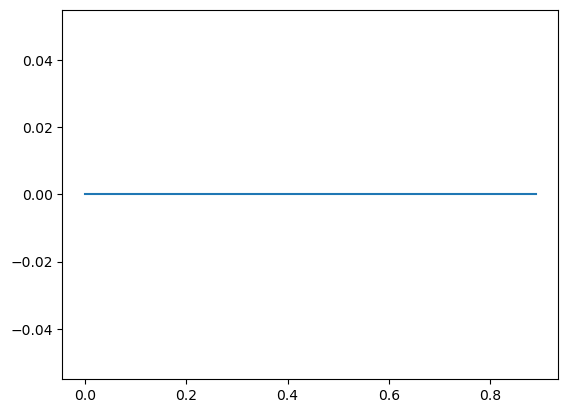

In [18]:
plt.plot(z_2,second_der)

### $\mu$ interpolator